# Patch Analysis

In [134]:
# Imports
from importlib import reload
import os

import numpy as np

import pandas
import h5py
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

from ulmo.plotting import plotting
from ulmo.mae import patch_analysis

import anly_patches

<module 'anly_patches' from '/home/xavier/Projects/Oceanography/python/ulmo/papers/MAE/Analysis/py/anly_patches.py'>

# Load the output file

In [45]:
f = np.load('mae_patches_t10_p20.npz')
list(f.keys())

['data', 'items']

In [46]:
data = f['data']
items = f['items']
items

array(['meanT', 'stdT', 'median_diff', 'std_diff', 'max_diff', 'i', 'j'],
      dtype='<U11')

In [47]:
data.shape

(10000, 52, 7)

## Reshape

In [48]:
data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))

# Table me

In [49]:
tbl = pandas.DataFrame(data, columns=items)
tbl.head()

,meanT,stdT,median_diff,std_diff,max_diff,i,j
0,0.565716,0.124143,-0.146675,0.079534,0.292810,0.0,40.0
1,0.732437,0.050911,-0.043529,0.045282,0.147853,0.0,44.0
2,-0.283329,0.032693,0.010058,0.007569,0.024012,4.0,0.0
3,-0.084868,0.017589,0.011065,0.005283,0.020870,4.0,16.0
4,0.820333,0.015397,0.000440,0.005214,0.008616,4.0,48.0


In [50]:
np.unique(tbl.i).size

16

# Plot something

## Binned stats

In [121]:
nbins = 16
metric = 'abs_median_diff'
#metric = 'median_diff'
#metric = 'std_diff'
#stat = 'median'
stat = 'mean'
#stat = 'std'

reload(anly_patches)
values, lbl = anly_patches.parse_metric(tbl, metric)

# Do it
median, x_edge, y_edge, ibins = scipy.stats.binned_statistic_2d(
    tbl.i, tbl.j, values,
        statistic=stat, expand_binnumbers=True, bins=[nbins,nbins])

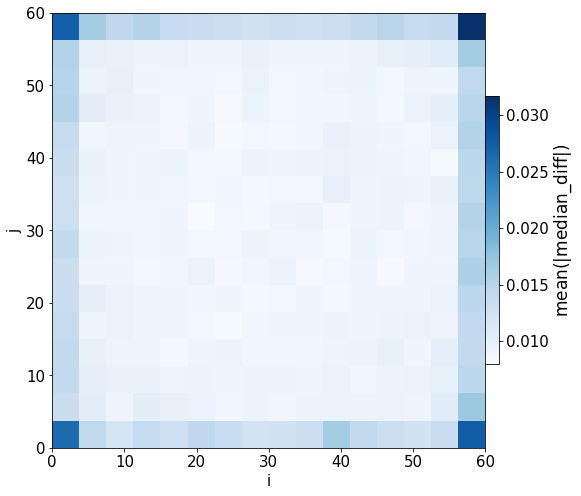

In [122]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = plt.gca()

cmap = 'Blues'
cm = plt.get_cmap(cmap)
mplt = ax.pcolormesh(x_edge, y_edge, 
                 median.transpose(),
                 cmap=cm, 
                 vmax=None) 
# Color bar
cbaxes = plt.colorbar(mplt, pad=0., fraction=0.030)
cbaxes.set_label(f'{stat}({lbl})', fontsize=17.)
cbaxes.ax.tick_params(labelsize=15)

# Axes
ax.set_xlabel(r'i')
ax.set_ylabel(r'j')

plotting.set_fontsize(ax, 15)

plt.show()

## Other patch properties: meanT, $\sigma$(T)

In [98]:
nbins = 32
#metric = 'abs_median_diff'
#metric = 'median_diff'
metric = 'log10_std_diff'
stat = 'median'
#stat = 'mean'
#stat = 'std'

x,y = 'meanT', 'stdT'

reload(anly_patches)
values, lbl = anly_patches.parse_metric(tbl, metric)

# Do it
median, x_edge, y_edge, ibins = scipy.stats.binned_statistic_2d(
    tbl[x], np.log10(tbl[y]), values,
        statistic=stat, expand_binnumbers=True, bins=[nbins,nbins])

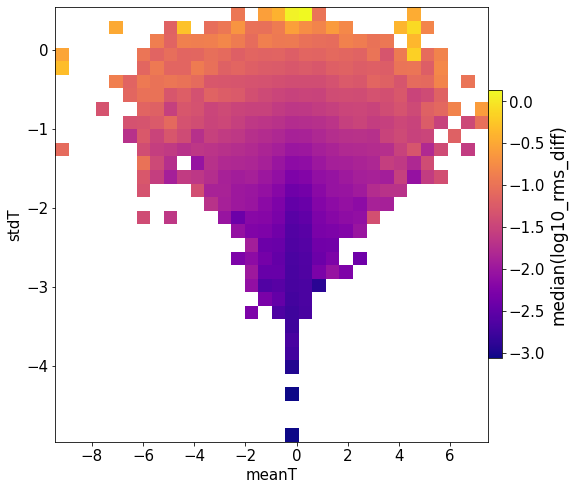

In [100]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = plt.gca()

cmap = 'plasma'
cm = plt.get_cmap(cmap)
mplt = ax.pcolormesh(x_edge, y_edge, 
                 median.transpose(),
                 cmap=cm, 
                 vmax=None) 
# Color bar
cbaxes = plt.colorbar(mplt, pad=0., fraction=0.030)
cbaxes.set_label(f'{stat}({lbl})', fontsize=17.)
cbaxes.ax.tick_params(labelsize=15)

# Axes
ax.set_xlabel(x)
ax.set_ylabel(y)

plotting.set_fontsize(ax, 15)

plt.show()

# One-D

In [116]:
reload(anly_patches)

nbins = 32
#metric = 'abs_median_diff'
#metric = 'median_diff'
metric = 'log10_std_diff'
stat = 'median'
#stat = 'mean'
#stat = 'std'

x_metric = 'log10_stdT'
xvalues, x_lbl = anly_patches.parse_metric(tbl, x_metric)

values, lbl = anly_patches.parse_metric(tbl, metric)

# Do it
eval_stats, x_edge, ibins = scipy.stats.binned_statistic(
    xvalues, values, statistic=stat, bins=nbins)

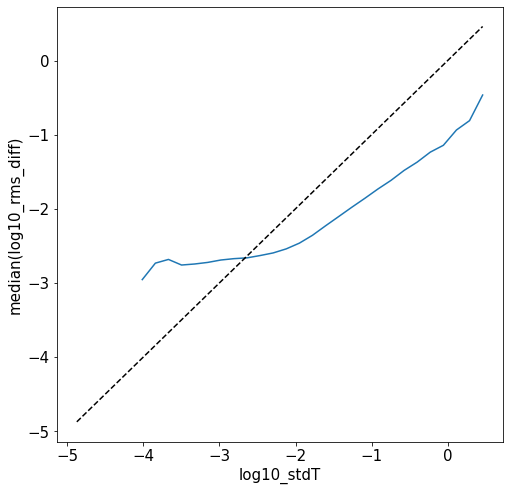

In [120]:
fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = plt.gca()

plt_x = (x_edge[:-1]+x_edge[1:])/2
ax.plot(plt_x, eval_stats)

# Axes
ax.set_xlabel(x_lbl)
ax.set_ylabel(f'{stat}({lbl})')

plotting.set_fontsize(ax, 15)

# 1-1
ax.plot(plt_x, plt_x, 'k--')

plt.show()

----

In [123]:
recon_dir = '/home/xavier/Projects/Oceanography/data/MAE/Recon'

In [129]:
mask_file = os.path.join(recon_dir, 'mae_mask_t10_p20.h5')
masks = h5py.File(mask_file, 'r')

In [143]:
mask0 = masks['valid'][0,0,...]
mask0[62,0]

1.0

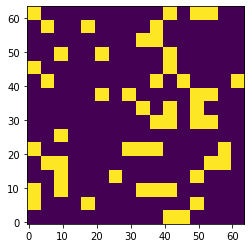

In [146]:
plt.imshow(mask0, origin='lower')

<AxesSubplot:>

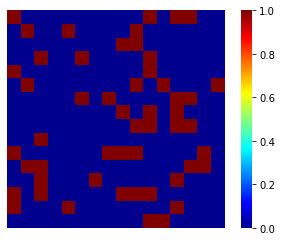

In [150]:
reload(plotting)
plotting.show_image(masks['valid'][0,0,...], set_aspect='equal')

In [135]:
patches = patch_analysis.find_patches(masks['valid'][0,0,...], 4)

In [148]:
recon = np.zeros_like(mask0)
p_sz = 4
for patch in patches:
    i, j = np.unravel_index(patch, mask0.shape)
    #
    recon[i:i+p_sz, j:j+p_sz] = 1

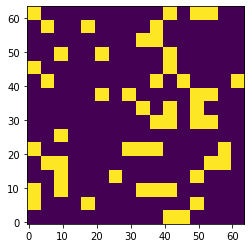

In [149]:
plt.imshow(recon, origin='lower')

In [137]:
for kk, patch in enumerate(patches):
    i, j = np.unravel_index(patch, masks['valid'][0,0,...].shape)
    print(i,j)

0 40
0 44
4 0
4 16
4 48
8 0
8 8
8 32
8 36
8 40
12 8
12 24
12 48
16 4
16 8
16 52
16 56
20 0
20 28
20 32
20 36
20 56
24 8
28 36
28 40
28 48
28 52
32 32
32 40
32 48
36 20
36 28
36 48
36 52
40 4
40 36
40 44
40 60
44 0
44 40
48 8
48 20
48 40
52 32
52 36
56 4
56 16
56 36
60 0
60 40
60 48
60 52


In [142]:
np.unravel_index?

Docstring:
unravel_index(indices, shape, order='C')

Converts a flat index or array of flat indices into a tuple
of coordinate arrays.

Parameters
----------
indices : array_like
    An integer array whose elements are indices into the flattened
    version of an array of dimensions ``shape``. Before version 1.6.0,
    this function accepted just one index value.
shape : tuple of ints
    The shape of the array to use for unraveling ``indices``.

    .. versionchanged:: 1.16.0
        Renamed from ``dims`` to ``shape``.

order : {'C', 'F'}, optional
    Determines whether the indices should be viewed as indexing in
    row-major (C-style) or column-major (Fortran-style) order.

    .. versionadded:: 1.6.0

Returns
-------
unraveled_coords : tuple of ndarray
    Each array in the tuple has the same shape as the ``indices``
    array.

See Also
--------
ravel_multi_index

Examples
--------
>>> np.unravel_index([22, 41, 37], (7,6))
(array([3, 6, 6]), array([4, 5, 1]))
>>> np.unravel_index